In [1]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats
from MTD import *

Populating the interactive namespace from numpy and matplotlib


In [22]:
#read data
#%run SC_dataframe.py
TS_df = pd.read_csv('../Data/TS_FIRReg_df.csv')
TS_df.head()

,Unnamed: 0,Time,Subject,Condition,MotorMapping,Run,FFA,PPA,RH,LH,PrimVis
0,0,1,512,FH,1,1,-0.216313,-0.001642,-0.307158,-0.168332,0.116184
1,1,2,512,FH,1,1,0.136759,0.199656,0.016624,-0.014293,-0.461675
2,2,3,512,FH,1,1,0.246782,-0.404403,0.523913,-0.244285,-0.218928
3,3,4,512,FH,1,1,0.169414,-0.446037,0.100451,-0.270053,0.047486
4,4,5,512,FH,1,1,0.444998,-0.459969,-0.089444,-0.324911,-0.404509


In [24]:
Subjects = [503,505,508,509,510,512,513,516,517,518,519,523,527,528,529,530,531,532,534,536,537,539,540,542,546,547,549,550]
Conditions = ['FH', 'Fo', 'Fp', 'HF', 'Ho', 'Hp']
MotorMapping = [1, 2]
corr_df = pd.DataFrame(columns=['Subj', 'Condition', 'FFA-VC', 'PPA-VC'], dtype=float)
#'Run', 'FFA-M','FFA-NM', 'PPA-M', 'PPA-NM',
Runs = [1, 2]
#motor mapping 1, RH-Face LH-Scene
#motor mapping 2, RH-Scene, LH-Face
i=1
for s, sub in enumerate(Subjects):
    for c, cond in enumerate(Conditions):
        for m, motormap in enumerate(MotorMapping):
            for run in Runs:
                PPA_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap) & (TS_df['Run'] == run)]['PPA'])
                FFA_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap) & (TS_df['Run'] == run)]['FFA'])
                #RH_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap) & (TS_df['Run'] == run)]['RH'])
                #LH_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap) & (TS_df['Run'] == run)]['LH'])
                VC_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap) & (TS_df['Run'] == run)]['PrimVis'])
                #FFA_ts[FFA_ts==0] = np.nan 
                #PPA_ts[PPA_ts==0] = np.nan
                #FFA_ts = np.ma.array(FFA_ts, mask=np.isnan(FFA_ts))
                #PPA_ts = np.ma.array(PPA_ts, mask=np.isnan(PPA_ts))
                #RH_ts[RH_ts==0] = np.nan 
                #LH_ts[LH_ts==0] = np.nan
                #RH_ts = np.ma.array(RH_ts, mask=np.isnan(RH_ts))
                #LH_ts = np.ma.array(LH_ts, mask=np.isnan(LH_ts))
                #VC_ts[VC_ts==0] = np.nan
                #VC_ts = np.ma.array(VC_ts, mask=np.isnan(VC_ts))


                corr_df.loc[i, 'Condition'] = cond
                corr_df.loc[i, 'Subj'] = sub
                corr_df.loc[i, 'Run'] = run
                #calculate visual coupling
                corr_df.loc[i,'FFA-VC'] = np.corrcoef(VC_ts, FFA_ts)[0,1]
                corr_df.loc[i,'PPA-VC'] = np.corrcoef(VC_ts, PPA_ts)[0,1]
                #corr_df.loc[i,'FFA-VC'] = np.nanmean(coupling(np.array([FFA_ts, VC_ts]).T, 10)[1][:,0,1])
                #corr_df.loc[i,'PPA-VC'] = np.nanmean(coupling(np.array([PPA_ts, VC_ts]).T, 10)[1][:,0,1])

                ## calculate visual motor mapping
                #if motormap == 1: 
                #    #motor mapping 1, RH-Face LH-Scene
                #    corr_df.loc[i,'FFA-M'] = np.nanmean(coupling(np.array([FFA_ts, RH_ts]).T, 10)[1][:,0,1])
                #    corr_df.loc[i,'FFA-NM'] = np.nanmean(coupling(np.array([FFA_ts, LH_ts]).T, 10)[1][:,0,1])
                #    corr_df.loc[i,'PPA-M'] = np.nanmean(coupling(np.array([PPA_ts, LH_ts]).T, 10)[1][:,0,1])
                #    corr_df.loc[i,'PPA-NM'] = np.nanmean(coupling(np.array([PPA_ts, RH_ts]).T, 10)[1][:,0,1])
                #if motormap == 2:
                #    #motor mapping 2, RH-Scene, LH-Face
                #    corr_df.loc[i,'FFA-M'] = np.nanmean(coupling(np.array([FFA_ts, LH_ts]).T, 10)[1][:,0,1])
                #    corr_df.loc[i,'FFA-NM'] = np.nanmean(coupling(np.array([FFA_ts, RH_ts]).T, 10)[1][:,0,1])
                #    corr_df.loc[i,'PPA-M'] = np.nanmean(coupling(np.array([PPA_ts, RH_ts]).T, 10)[1][:,0,1])
                #    corr_df.loc[i,'PPA-NM'] = np.nanmean(coupling(np.array([PPA_ts, LH_ts]).T, 10)[1][:,0,1])
                i = i+1

In [34]:
corr_df.groupby(['Condition','Subj']).mean().reset_index().groupby(['Condition']).mean()

,Subj,FFA-VC,PPA-VC,Run
Condition,,,,
FH,526.785714,0.206254,0.294496,1.5
Fo,526.785714,0.177241,0.266814,1.5
Fp,526.785714,0.164877,0.293604,1.5
HF,526.785714,0.201086,0.271741,1.5
Ho,526.785714,0.183083,0.276189,1.5
Hp,526.785714,0.174207,0.284220,1.5


In [83]:
corr_df.groupby('Condition').mean()

,Subj,Run,FFA-M,FFA-NM,PPA-M,PPA-NM,FFA-VC,PPA-VC
Condition,,,,,,,,
FH,526.785714,1.5,-0.118522,-0.099162,-0.068450,-0.048193,0.077902,0.491228
Fo,526.785714,1.5,-0.081169,-0.078097,-0.049739,-0.021802,0.140745,0.408863
Fp,526.785714,1.5,-0.038587,-0.087968,-0.045023,-0.036335,0.058924,0.416128
HF,526.785714,1.5,-0.175154,-0.134012,-0.022809,-0.043906,0.175530,0.466436
Ho,526.785714,1.5,-0.113325,-0.092643,-0.104893,-0.096817,0.134130,0.482391
Hp,526.785714,1.5,-0.048236,-0.013395,-0.035085,-0.040969,0.060592,0.470883


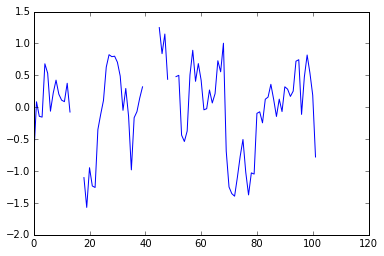

In [84]:
plt.plot(FFA_ts)